<a href="https://colab.research.google.com/github/abuebayyeh/imperial_eee_machine_learning_course/blob/main/07_ML_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-nearest neighbour (k-NN)


---


The k-Nearest Neighbors (k-NN) algorithm is a versatile supervised machine learning technique suitable for both classification and regression tasks. At its core, k-NN operates on the principle that you can determine the label or value of a data point by examining its proximity to other data points with known labels or values. In essence, it's like asking your neighbors for advice when you're unsure about something – your decision is influenced by what your nearby neighbors think.

## Understanding the Basics

Here's a breakdown of the fundamental concepts behind the k-NN algorithm:

### 1. Nearest Neighbors

When using k-NN, the algorithm identifies the k data points that are closest to the data point you want to classify or predict. These data points serve as your "neighbors" in the feature space. The choice of distance metric, such as Euclidean or Manhattan distance, determines how we measure this closeness.

### 2. Selecting 'k'

One crucial parameter you must decide on is 'k,' the number of nearest neighbors to consider. The value of 'k' significantly influences the algorithm's behavior. To illustrate, let's say we have two classes, represented as △ and □, and we want to classify an unknown point represented by a question mark (?).

   - If 'k' is set to 1, the algorithm assigns the class of the closest neighbor, in this case, △.
   - If 'k' is set to 3, the algorithm looks at the three nearest neighbors and assigns the class based on the majority, which in this example would be □.

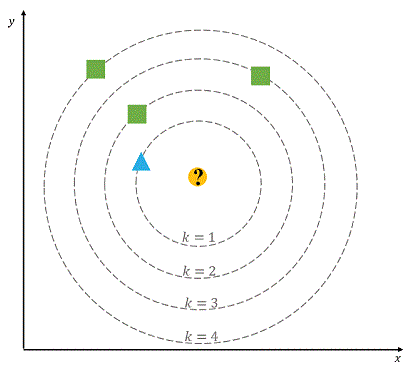

### Pros and Cons

k-NN has its strengths and weaknesses:

**Advantages:**

- No Explicit Training: Unlike many other machine learning algorithms, k-NN doesn't require a dedicated training step. It learns from the data directly during classification or prediction.
- No Data Loss: All information present in the training data is retained because the algorithm stores the instances explicitly.

**Disadvantages:**

- High Computation Cost: Most of the computation occurs during classification, which can be computationally expensive, especially for large datasets.
- Memory Intensive: Since k-NN considers the entire training set during classification, it demands substantial memory capacity.
- Sensitivity to 'k': The choice of 'k' can significantly affect the algorithm's output, making it sensitive to this hyperparameter.

In this Google Colab exercise, we will explore how to implement and fine-tune the k-NN algorithm, understanding its strengths and weaknesses, and gaining practical insights into its application.




In this tutorial, we will investigate using k-NN classifier on the Iris-datset.

In [ ]:
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
iris_data = datasets.load_iris()

In [ ]:
# Function to divide the data into training and testing

import random
random.seed(22)
def separate_data():
    train_A = iris_dataset[0:40]
    test_A = iris_dataset[40:50]
    train_B = iris_dataset[50:90]
    test_B = iris_dataset[90:100]
    train_C = iris_dataset[100:140]
    test_C = iris_dataset[140:150]
    train = np.concatenate((train_A,train_B,train_C))
    test =  np.concatenate((test_A,test_B,test_C))
    return train,test

iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

X_train = np.array([i[:4] for i in Filetrain])
y_train = np.array([i[4] for i in Filetrain])
X_test = np.array([i[:4] for i in Filetest])
y_test = np.array([i[4] for i in Filetest])

In [ ]:
def distance(p1, p2):
    squared_difference = 0.0
    for i in range(len(p1)):
        squared_difference += (p1[i] - p2[i])**2
    final_distance = squared_difference ** 0.5
    return final_distance

In [ ]:
def fit(test_sample, training_set, training_labels, k):

    distances = []

    # Computing the distances for all data points with respect to test sample

    for i in range(len(training_set)):
        distance_to_point = distance(test_sample, training_set[i])
        distances.append([distance_to_point, training_set[i], training_labels[i]])
    # sort the distances
    distances.sort(key = lambda x : x[0])

    # Find the k nearest neighbours according to the distances
    k_nearest_neighbours = distances[0:k]

    # Getting class with majority voting
    label_counts = {}
    for i in range(0, k):
        closest_label = k_nearest_neighbours[i][2]

        if (closest_label in label_counts) == True:
            label_counts[closest_label] += 1
        else:
            label_counts[closest_label] = 1

    labelCounts = list(label_counts.values())
    classes = list(label_counts.keys())
    y_pred = classes[labelCounts.index(max(labelCounts))]

    return (k_nearest_neighbours, y_pred)

In [ ]:
k = 3
print(f'Test sample predictions for k = {k} \t')
print('*********************************')
for i in range(len(X_test)):
    neighbours, pred_label = fit(X_test[i], X_train, y_train, k)
    if (pred_label == y_test[i]):
        print(f'test sample: {X_test[i]} \t',
          f'predicted label: {pred_label} \t', f'true label: {y_test[i]} \t', "Correctly classified")
    else:

        print(f'test sample: {X_test[i]} \t',
          f'predicted label: {pred_label} \t', f'true label: {y_test[i]} \t', "Misclassified")

Test sample predictions for k = 3 	
*********************************
test sample: [5.1 3.8 1.9 0.4] 	 predicted label: 0.0 	 true label: 0.0 	 Correctly classified
test sample: [6.3 2.3 4.4 1.3] 	 predicted label: 1.0 	 true label: 1.0 	 Correctly classified
test sample: [6.5 3.  5.5 1.8] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [6.7 2.5 5.8 1.8] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [6.2 2.9 4.3 1.3] 	 predicted label: 1.0 	 true label: 1.0 	 Correctly classified
test sample: [7.2 3.2 6.  1.8] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [4.4 2.9 1.4 0.2] 	 predicted label: 0.0 	 true label: 0.0 	 Correctly classified
test sample: [6.1 2.9 4.7 1.4] 	 predicted label: 1.0 	 true label: 1.0 	 Correctly classified
test sample: [7.1 3.  5.9 2.1] 	 predicted label: 2.0 	 true label: 2.0 	 Correctly classified
test sample: [4.7 3.2 1.3 0.2] 	 predicted label: 0.0 	 true label: 0.0 	 C

In [ ]:
def accuracy(pred_label, true_label):
    TP = 0
    for i in range(len(pred_label)):
        if(pred_label[i] == true_label[i]):
            TP += 1

    accuracy = (TP / len(pred_label))
    return accuracy

For k = 1, Accuracy 0.9333333333333333 %
For k = 3, Accuracy 0.9666666666666667 %
For k = 5, Accuracy 0.9666666666666667 %
For k = 7, Accuracy 0.9666666666666667 %
For k = 9, Accuracy 0.9666666666666667 %
For k = 11, Accuracy 0.9666666666666667 %
For k = 13, Accuracy 1.0 %
For k = 15, Accuracy 1.0 %
For k = 17, Accuracy 0.9666666666666667 %
For k = 19, Accuracy 0.9666666666666667 %
For k = 21, Accuracy 0.9666666666666667 %
For k = 23, Accuracy 0.9666666666666667 %
For k = 25, Accuracy 0.9666666666666667 %
For k = 27, Accuracy 0.9666666666666667 %
For k = 29, Accuracy 0.9666666666666667 %


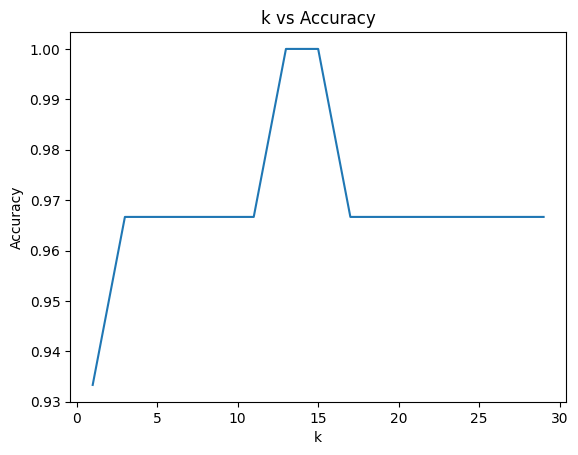

In [ ]:
accuracy_list = []
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

for k in k_list:
    y_pred = []
    for test_instance in X_test:
        neighbours, pred_label = fit(test_instance, X_train, y_train, k)
        y_pred.append(pred_label)
    acc = accuracy(y_pred, y_test)
    print("For k = {}, Accuracy {} %".format(k,acc))

    accuracy_list.append(acc)
plt.plot(k_list, accuracy_list)

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')

plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def decision_boundary(k):
    # For better data visulaisation we considered the first two features (petal length and sepal length)
    # in the decision boundary plot.
    X = np.concatenate((X_train, X_test))
    X = X[:, :2]
    y = np.concatenate((y_train, y_test))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = np.c_[xx.ravel(), yy.ravel()]

    y_preds = []

    for item in Z:
        neighbours, pred_label = fit(item, X, y, k)
        y_preds.append(pred_label)

     # Put the result into a color plot
    y_preds = np.asarray(y_preds)
    y_preds = y_preds.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, y_preds, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary for k = {0}".format(k))

    plt.show()

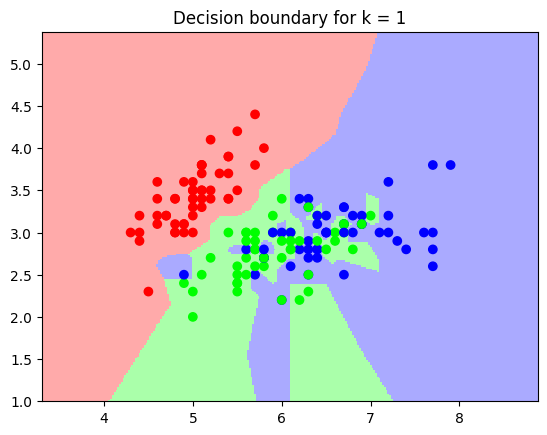

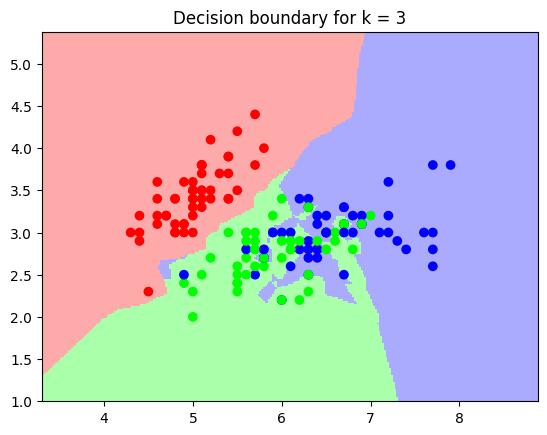

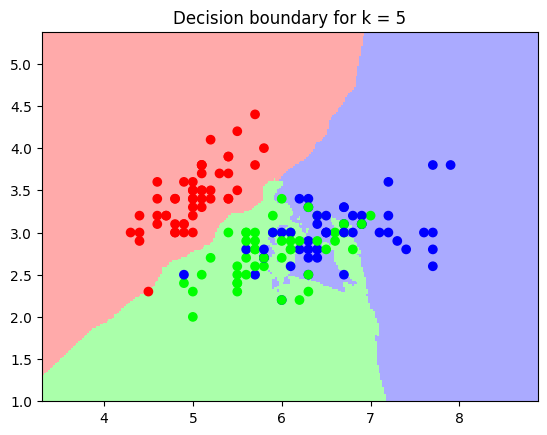

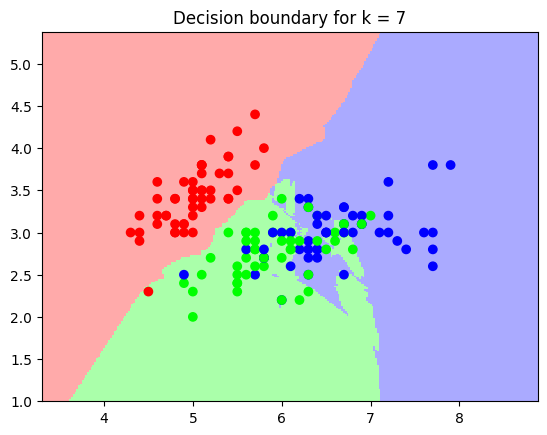

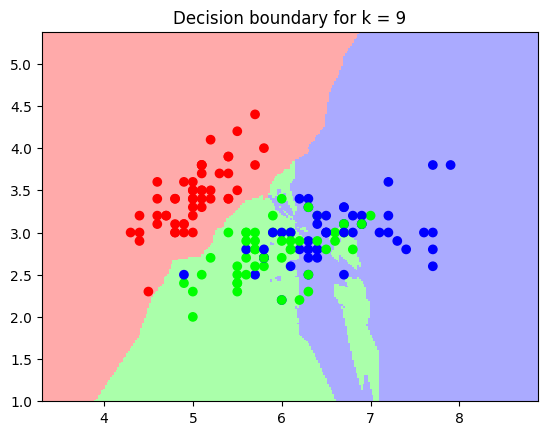

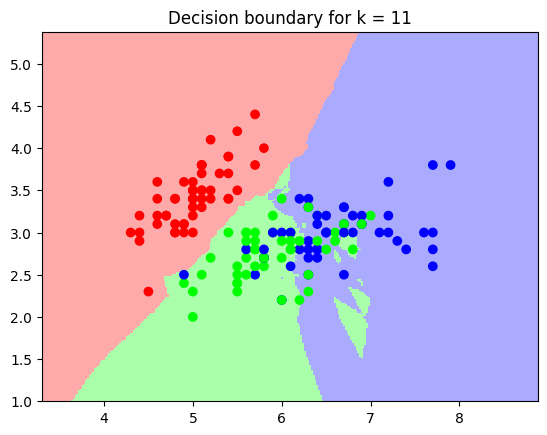

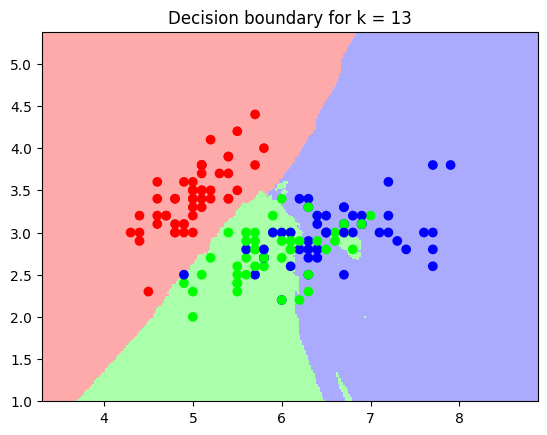

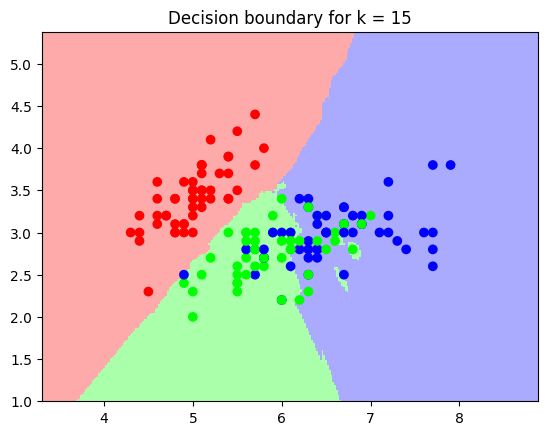

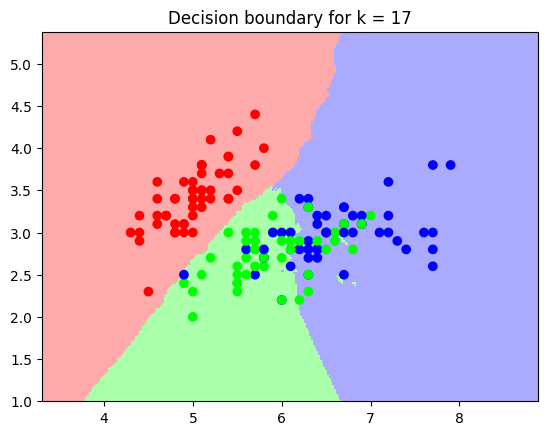

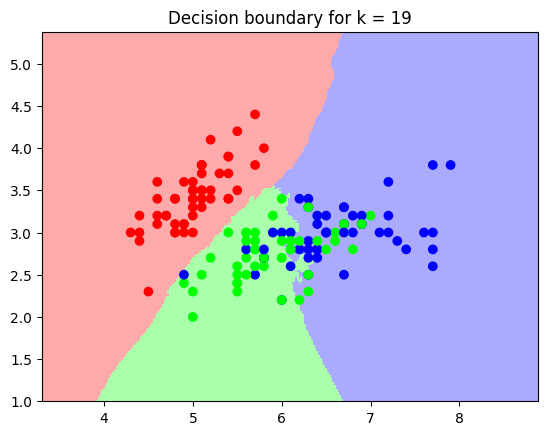

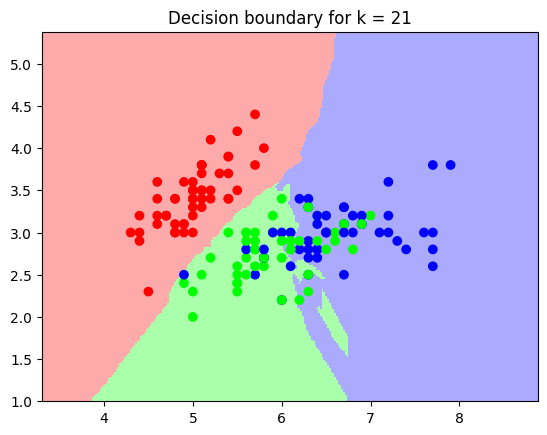

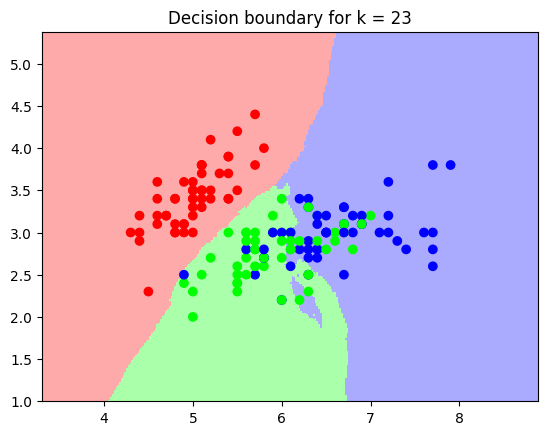

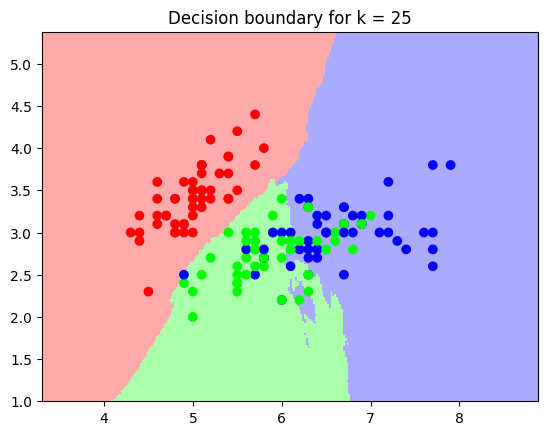

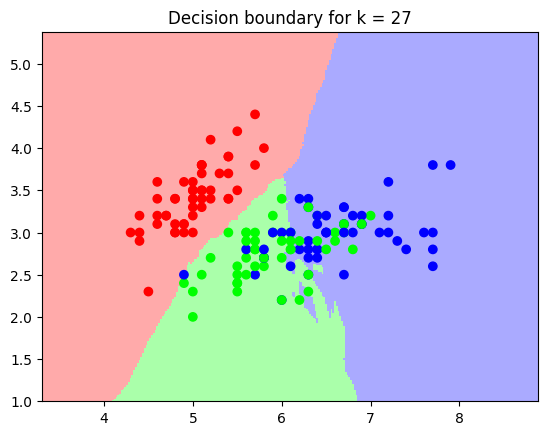

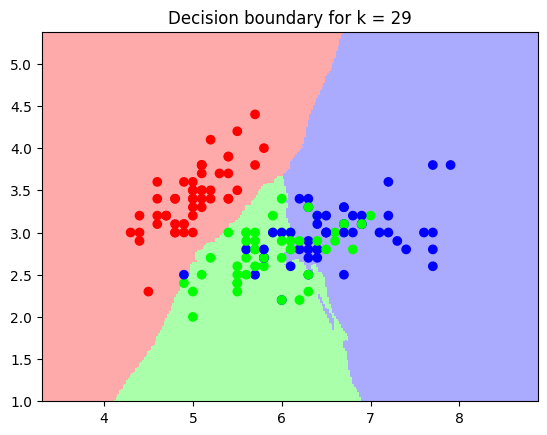

In [ ]:
# This code may take several minutes to finish
for k in k_list:
    decision_boundary(k)

# Distance Measures

When using the k-Nearest Neighbors (k-NN) algorithm, selecting an appropriate distance measure is crucial as it affects how "closeness" between data points is defined. Different distance measures are used depending on the nature of the data and the problem you're trying to solve. Here, we'll explore four common distance measures:

## Euclidean Distance

Euclidean distance is the most widely used distance measure. It calculates the straight-line distance between two points in the feature space. For two points, $\mathbf{p} = (x_1, y_1, z_1, \ldots)$ and $\mathbf{q} = (x_2, y_2, z_2, \ldots)$, Euclidean distance is calculated as:


$ d_{\text{Euclidean}}(\mathbf{p}, \mathbf{q}) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2 + \ldots} $


It measures the "as-the-crow-flies" distance and works well for continuous data.

## Manhattan Distance

Manhattan distance, also known as L1 distance, calculates the sum of absolute differences between the coordinates of two points. It is especially suitable for data with a grid-like structure, such as grids or city block layouts. For points A and B, it is computed as:

$ d_{\text{Manhattan}}(\mathbf{p}, \mathbf{q}) = |x_2 - x_1| + |y_2 - y_1| + |z_2 - z_1| + \ldots  $

## Minkowski Distance

Minkowski distance is a generalized distance measure that includes Euclidean and Manhattan distances as special cases. It's controlled by a parameter 'p,' and for 'p' equal to 1, it becomes the Manhattan distance, while for 'p' equal to 2, it's the Euclidean distance. The formula is:

$ d_{\text{Minkowski}}(\mathbf{p}, \mathbf{q}, p) = \left(\sum_{i=1}^{n} |p_i - q_i|^p\right)^{\frac{1}{p}}  $

The choice of 'p' allows you to adjust the sensitivity to different features and data distributions.

## Task 1 [60 marks]

In the previous exercise, we utilised the Euclidean distance measure to calculate the distances between test samples and their neighbors. Now, let's explore the impact of alternative distance measures, specifically Minkowski (with a 'p' value of 3) and Manhattan distances, on our results. In your report, follow these steps:

1. **Code Implementation**: Implement the necessary code to compute Minkowski and Manhattan distances.

2. **Consistent 'k' Values**: Keep the same 'k' values used in the previous code to to get the accuracy results of the distance measures used.

3. **Accuracy Table**: Create a table that showcases the accuracy results for each distance measure and 'k' value.

4. **Discussion**: Provide a thoughtful discussion of your findings, including any differences observed in the results and their potential implications.



# Scikit-learn Implementation

If you're looking to apply k-NN algorithm to your data using Python, scikit-learn provides a convenient and user-friendly way to do so. First, you'll need to import the necessary module:
```python
from sklearn.neighbors import KNeighborsClassifier
```

You can initialise the classifier with various parameters:
> More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


> More information on distacnce measures using scikit-learn can be found [here](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html)



## Task 2 [40 marks]

In this task, your objective is to replicate the procedure outlined in the tutorial using Scikit-Learn for the k-Nearest Neighbors (k-NN) algorithm. Follow these steps and include your findings in your report:

1. **Code Implementation**: Write Python code using Scikit-Learn to perform k-NN as demonstrated in the tutorial.

2. **Accuracy Comparison**: Generate a table that compares the accuracy results from Task1 with the ones obtained using Scikit-Learn for different distance measures and 'k' values.
